### Packages

In [11]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl

%matplotlib inline
np.random.seed(1)

### Load Data and Split into Train/Test set

In [12]:
def load_happy_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [13]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


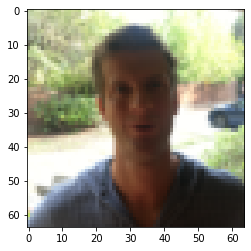

In [14]:
index = 120
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

### TF Keras Sequential API

In [15]:

def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    We'll hard-code all the values such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
        
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            ## Conv2D with 32 7x7 filters and stride of 1
            ## BatchNormalization for axis 3
            ## ReLU
            ## Max Pooling 2D with default parameters
            ## Flatten layer
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            
            tfl.ZeroPadding2D(padding=(3,3),input_shape=(64,64,3)),
            tfl.Conv2D(filters=32,kernel_size =7,strides=(1,1)),
            tfl.BatchNormalization(axis=3),
            tfl.ReLU(),
            tfl.MaxPool2D(),
            tfl.Flatten(),
            tfl.Dense(1,activation='sigmoid')
        ])
    
    return model

In [16]:
happy_model = happyModel()

In [17]:
#When the string accuracy is specified as a metric,
#the type of accuracy used will be automatically converted based on the loss function used.

happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [18]:
happy_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPaddi  (None, 70, 70, 3)        0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                      

### Train and evaluate model 

In [19]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 4s 76ms/step - loss: 0.9108 - accuracy: 0.7600
Epoch 2/10
38/38 [==============================] - 3s 82ms/step - loss: 0.2131 - accuracy: 0.9133
Epoch 3/10
38/38 [==============================] - 3s 76ms/step - loss: 0.1763 - accuracy: 0.9317
Epoch 4/10
38/38 [==============================] - 3s 78ms/step - loss: 0.1327 - accuracy: 0.9517
Epoch 5/10
38/38 [==============================] - 3s 79ms/step - loss: 0.1562 - accuracy: 0.9400
Epoch 6/10
38/38 [==============================] - 3s 80ms/step - loss: 0.1182 - accuracy: 0.9650
Epoch 7/10
38/38 [==============================] - 3s 76ms/step - loss: 0.1267 - accuracy: 0.9533
Epoch 8/10
38/38 [==============================] - 3s 78ms/step - loss: 0.1427 - accuracy: 0.9550
Epoch 9/10
38/38 [==============================] - 3s 76ms/step - loss: 0.1577 - accuracy: 0.9433
Epoch 10/10
38/38 [==============================] - 3s 76ms/step - loss: 0.0848 - accuracy: 0.9667


In [10]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 1s 54ms/step - loss: 0.2152 - accuracy: 0.8933


[0.21519815921783447, 0.8933333158493042]